In [1]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('result.csv')
# cols_drop = []
# for col in df.columns.values:
#     if df[col].isnull().sum()/ 480.0 > 0.5:
#         cols_drop.append(col)
# df = df.drop(cols_drop, axis=1)
# print(df)
df = df.fillna(0)
#print(df)
region = df.region_name.unique()

def split_region(i):
    val_state = np.array([region[3*i], region[3*i+1], region[3*i+2]])
    train = df.loc[~np.in1d(df['region_name'], val_state)]
    val = df.loc[np.in1d(df['region_name'], val_state)]
    return (train, val)

time_train = df.loc[df['date'] < '2020-08-10']
time_val = df.loc[df['date'] >= '2020-08-10']


In [2]:
from math import sqrt

score_list = []
for k in range(1,10):
    score_list_cv = []
    for i in range(0,4):
        train, val = split_region(i)
        x_train = train.iloc[:,2:-1]
        y_train = train.iloc[:, -1]
        x_val = val.iloc[:,2:-1]
        y_val = val.iloc[:,-1] 
    
        neigh = KNN(k)
        neigh.fit(x_train, y_train)
        y_pred = neigh.predict(x_val)
        score_list_cv.append(sqrt(metrics.mean_absolute_error(y_val,y_pred)))
    score_list.append(min(score_list_cv))


In [3]:
print(min(score_list))
print(score_list)

5.131601439446884
[5.131601439446884, 5.347896782848375, 5.780234520424852, 5.719119978924497, 5.708667873408724, 5.637013919259552, 5.855671514770008, 5.972157622389639, 5.993412021071219]


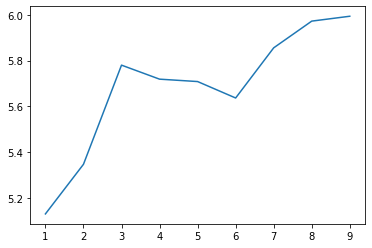

In [4]:
plt.plot(range(1,10),score_list)